In [6]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from os import getcwd
from absl import logging
logging.set_verbosity(logging.ERROR)

print('\u2022 Using TensorFlow Version:', tf.__version__)
print('\u2022 GPU Device Found.' if tf.config.list_physical_devices('GPU') else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.15.0
• GPU Device Found.


In [7]:
fire = pd.read_csv("./dataset_shuffled.csv")
fire.head()

,Unnamed: 0,Time,Reading ID,Humidity,Temperature,MQ139,TVOC,eCO2,Detector,Detector-Code,Status
0,0,15:08:18,111,61.7,23.2,104,44,440,OFF,0,0
1,1,0:00:03,4,61.9,24.2,155,0,400,OFF,0,0
2,2,0:01:00,31,38.4,21.8,68,4,418,OFF,0,1
3,3,15:15:24,537,61.3,23.7,110,170,494,OFF,0,1
4,4,0:29:02,872,41.0,22.0,77,239,489,OFF,0,1


In [8]:
fire.tail()

,Unnamed: 0,Time,Reading ID,Humidity,Temperature,MQ139,TVOC,eCO2,Detector,Detector-Code,Status
11792,11792,0:04:20,131,39.1,21.9,69,80,460,OFF,0,1
11793,11793,0:15:36,469,39.2,22.1,72,132,443,OFF,0,1
11794,11794,15:19:10,763,61.7,23.6,110,168,444,OFF,0,1
11795,11795,12:14:59,1468,66.5,20.6,90,32,422,OFF,0,0
11796,11796,15:23:16,1009,62.0,23.8,114,208,452,OFF,0,1


In [10]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11797 entries, 0 to 11796
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11797 non-null  int64  
 1   Time           11797 non-null  object 
 2   Reading ID     11797 non-null  int64  
 3   Humidity       11797 non-null  float64
 4   Temperature    11797 non-null  float64
 5   MQ139          11797 non-null  int64  
 6   TVOC           11797 non-null  int64  
 7   eCO2           11797 non-null  int64  
 8   Detector       11797 non-null  object 
 9   Detector-Code  11797 non-null  int64  
 10  Status         11797 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1013.9+ KB


In [11]:
fire.describe()

,Unnamed: 0,Reading ID,Humidity,Temperature,MQ139,TVOC,eCO2,Detector-Code,Status
count,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000
mean,5898.000000,1051.701110,56.280037,22.869645,155.331779,2108.972366,4239.956091,0.158854,0.955073
std,3405.644897,791.147819,10.105255,1.483583,97.631957,5344.065269,8889.025641,0.365555,0.658061
min,0.000000,1.000000,37.800000,20.600000,68.000000,0.000000,400.000000,0.000000,0.000000
25%,2949.000000,375.000000,44.700000,21.500000,87.000000,62.000000,410.000000,0.000000,1.000000
50%,5898.000000,853.000000,60.700000,22.900000,114.000000,197.000000,471.000000,0.000000,1.000000
75%,8847.000000,1671.000000,63.300000,24.200000,194.000000,1228.000000,3022.000000,0.000000,1.000000
max,11796.000000,2974.000000,67.100000,25.300000,542.000000,39155.000000,57330.000000,1.000000,2.000000


In [12]:
fire.columns

Index(['Unnamed: 0', 'Time', 'Reading ID', 'Humidity', 'Temperature', 'MQ139',
       'TVOC', 'eCO2', 'Detector', 'Detector-Code', 'Status'],
      dtype='object')

In [13]:
fire.isna().sum()

Unnamed: 0       0
Time             0
Reading ID       0
Humidity         0
Temperature      0
MQ139            0
TVOC             0
eCO2             0
Detector         0
Detector-Code    0
Status           0
dtype: int64

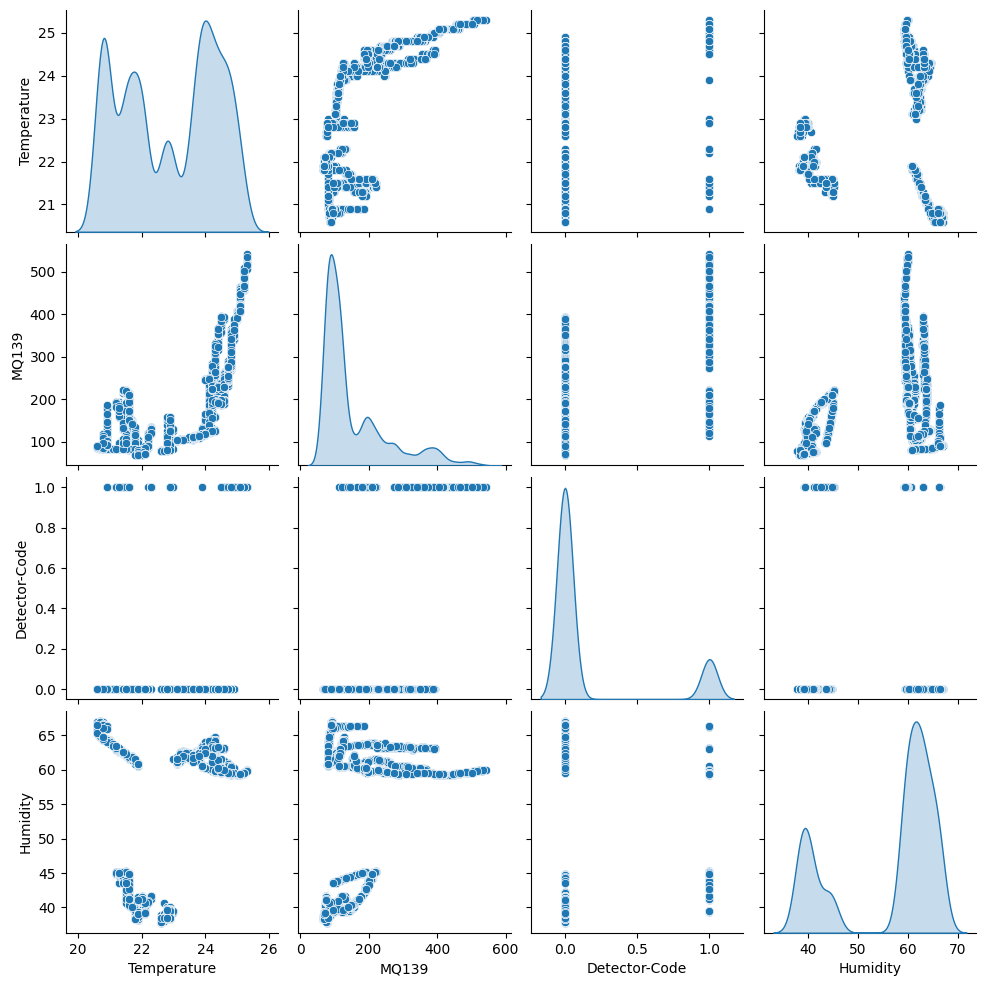

In [21]:
# Calculate correlation between columns
sns.pairplot(fire[["Temperature","MQ139","Detector-Code","Humidity"]], diag_kind='kde')

<Axes: >

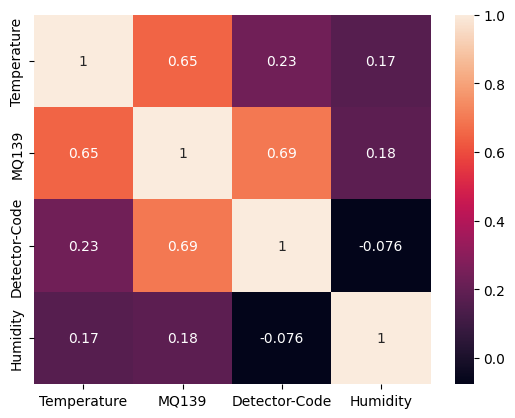

In [22]:
df = pd.read_csv("dataset_shuffled.csv")
df = df[["Temperature","MQ139","Detector-Code","Humidity"]]

# Calculate correlation between columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [16]:
# Perform one-hot encoding for the 'Detector' column and drop the first column
columns_to_encode = ['Detector']
fire_encoded = pd.get_dummies(fire, columns=columns_to_encode, prefix='Detector', drop_first=True)
fire_encoded['Detector_ON'] = fire_encoded['Detector_ON'].astype(int)
print(fire_encoded)

       Unnamed: 0      Time  Reading ID  Humidity  Temperature  MQ139  TVOC  \
0               0  15:08:18         111      61.7         23.2    104    44   
1               1   0:00:03           4      61.9         24.2    155     0   
2               2   0:01:00          31      38.4         21.8     68     4   
3               3  15:15:24         537      61.3         23.7    110   170   
4               4   0:29:02         872      41.0         22.0     77   239   
...           ...       ...         ...       ...          ...    ...   ...   
11792       11792   0:04:20         131      39.1         21.9     69    80   
11793       11793   0:15:36         469      39.2         22.1     72   132   
11794       11794  15:19:10         763      61.7         23.6    110   168   
11795       11795  12:14:59        1468      66.5         20.6     90    32   
11796       11796  15:23:16        1009      62.0         23.8    114   208   

       eCO2  Detector-Code  Status  Detector_ON  
0

In [25]:
#NORMALIZED THE DATA
parameters_encoded = fire_encoded[['Temperature', 'MQ139', 'Detector_ON','Humidity']].values
max_values = parameters_encoded.max(axis=0)
normalized_arr = parameters_encoded / max_values
print(normalized_arr)

labels = fire['Status'].values

[[0.91699605 0.19188192 0.         0.9195231 ]
 [0.95652174 0.28597786 0.         0.92250373]
 [0.86166008 0.12546125 0.         0.57228018]
 ...
 [0.93280632 0.20295203 0.         0.9195231 ]
 [0.81422925 0.16605166 0.         0.99105812]
 [0.94071146 0.2103321  0.         0.92399404]]


In [26]:
#SPLIT DATA TO TRAIN, VALID, AND TEST
TRAINING = 10000
VALID = 900 + TRAINING

train_param, valid_param, test_param = normalized_arr[:TRAINING], normalized_arr[TRAINING:VALID], normalized_arr[VALID:]
train_label, valid_label, test_label = labels[:TRAINING], labels[TRAINING:VALID], labels[VALID:]

In [27]:
#MAKE CLASS CALLBACKS
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            # Stop if threshold is met
            print("\naccuracy higher than 0.99  so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [28]:
#MAKE MODEL
model = tf.keras.models.Sequential([
        keras.layers.Dense(units=512, input_shape=(4,), activation='relu'),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=3, activation='softmax')
    ])

#COMPILE MODEL
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 68611 (268.01 KB)
Trainable params: 68611 (268.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
#FIT MODEL
history = model.fit(train_param,
          train_label,
          validation_data=(valid_param, valid_label),
          epochs=100)

Epoch 1/100
313/313 [==============================] - 3s 4ms/step - loss: 0.4270 - accuracy: 0.8280 - val_loss: 0.2544 - val_accuracy: 0.9133
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.9048 - val_loss: 0.2517 - val_accuracy: 0.9378
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.9060 - val_loss: 0.2311 - val_accuracy: 0.9222
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9075 - val_loss: 0.2169 - val_accuracy: 0.9233
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.9105 - val_loss: 0.2066 - val_accuracy: 0.9222
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.9111 - val_loss: 0.2100 - val_accuracy: 0.9300
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.9149 - val_loss: 0.2041 - val_accuracy: 0.9278

In [30]:
#RETRIEVE A LIST OF RESULTS
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

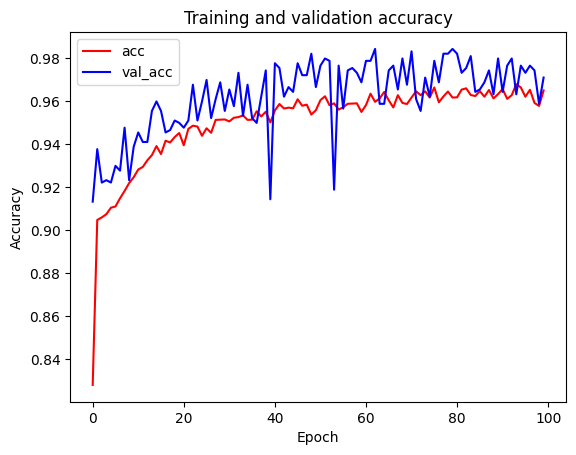

In [40]:
#PLOT ACCURACY
plt.plot(epochs, acc, 'r', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

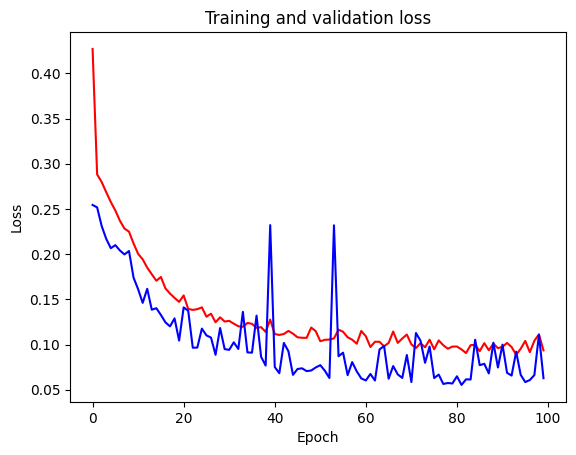

In [41]:
#PLOT LOSS
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [64]:
#TESTING MODEL
benar,salah = 0, 0
print("!===============================!")
hasil = np.argmax(model.predict([test_param]),axis=1)
hasil_df ={
    "Temperature":test_param[:, 0],
    "MQ139": test_param[:, 1],
    "Detector": test_param[:, 2],
    "Humidity": test_param[:, 3],
    "Fire Alarm": test_label,
    "Hasil": hasil
}
hasil_df = pd.DataFrame(hasil_df)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for i in range(0,len(test_param)):
    if hasil[i] == int(test_label[i]):
        benar +=1
    else:
        salah += 1

print(hasil_df.head())
print(hasil_df.tail())
print()
print(f"Benar = {benar}; Salah = {salah}; Accuracy: {benar/float(benar+salah)}")

!===============================!
29/29 [==============================] - 0s 2ms/step
   Temperature     MQ139  Detector  Humidity  Fire Alarm  Hasil
0     0.873518  0.156827       0.0  0.606557           1      1
1     0.976285  0.509225       1.0  0.886736           2      2
2     0.857708  0.149446       0.0  0.915052           0      0
3     0.928854  0.202952       0.0  0.919523           1      1
4     0.869565  0.132841       0.0  0.584203           1      1
     Temperature     MQ139  Detector  Humidity  Fire Alarm  Hasil
892     0.865613  0.127306       0.0  0.582712           1      1
893     0.873518  0.132841       0.0  0.584203           1      1
894     0.932806  0.202952       0.0  0.919523           1      1
895     0.814229  0.166052       0.0  0.991058           0      0
896     0.940711  0.210332       0.0  0.923994           1      1

Benar = 878; Salah = 19; Accuracy: 0.9788182831661093


In [65]:
#SAVE MODEL
model.save("siaga_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##TRY TO TEST MODEL FROM .H5

In [72]:
model = tf.keras.models.load_model("siaga_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert();

In [67]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

73912

In [68]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_dense_input:0', 'index': 0, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [69]:
def siaga_normalize(arrData):
    #normalisasi data menjadi antara 0 dan 1, jika berada diluar batas parameter yang sudah ditentukan
    #maka nilainya akan lebih dari 1 atau kurang dari 0
    max_val = np.array((25.3, 542, 1, 67.1))
    min_val = np.array((20.6, 68, 0, 37.8))
    for i in range(len(arrData)):
      for j in range(len(arrData[i])):
        arrData[i][j] = (arrData[i][j] - min_val[j])/max_val[j]

    return arrData

In [70]:
def siaga_outliers(normalized_arrData):
  #cek apakah ada yang diatas 0 atau 1
    if ((normalized_arrData < 0).any() or (normalized_arrData > 1).any()):
        return False
    else:
        return True

In [73]:
#TESTING
input_shape = input_details[0]['shape']

input_data = np.array([[23,100,1,60]], dtype=np.float32)
norm_input_data = siaga_normalize(input_data)#normalisasi data

if (siaga_outliers(norm_input_data)):#cek outlier
  #prediksi model
  interpreter.set_tensor(input_details[0]['index'], norm_input_data)
  tf_results = model(tf.constant(input_data))
  print(np.argmax(tf_results))
else:
  print("Mengandung Outlier")

2
